<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)

In [ ]:
Y_confirmed

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 3

In [ ]:
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
# future_forecast

In [ ]:
# adjusted_dates

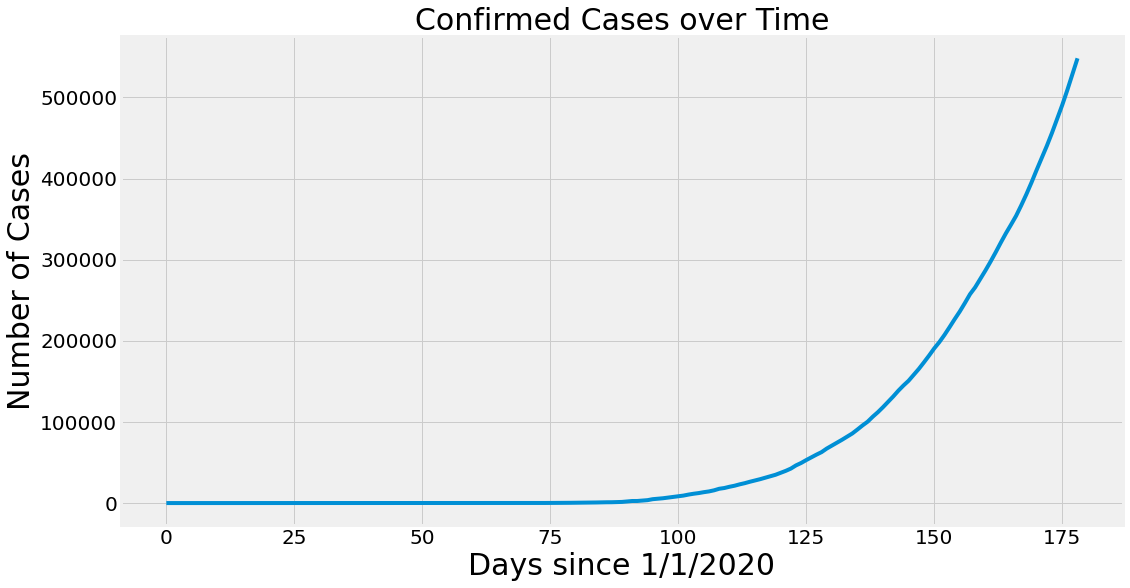

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

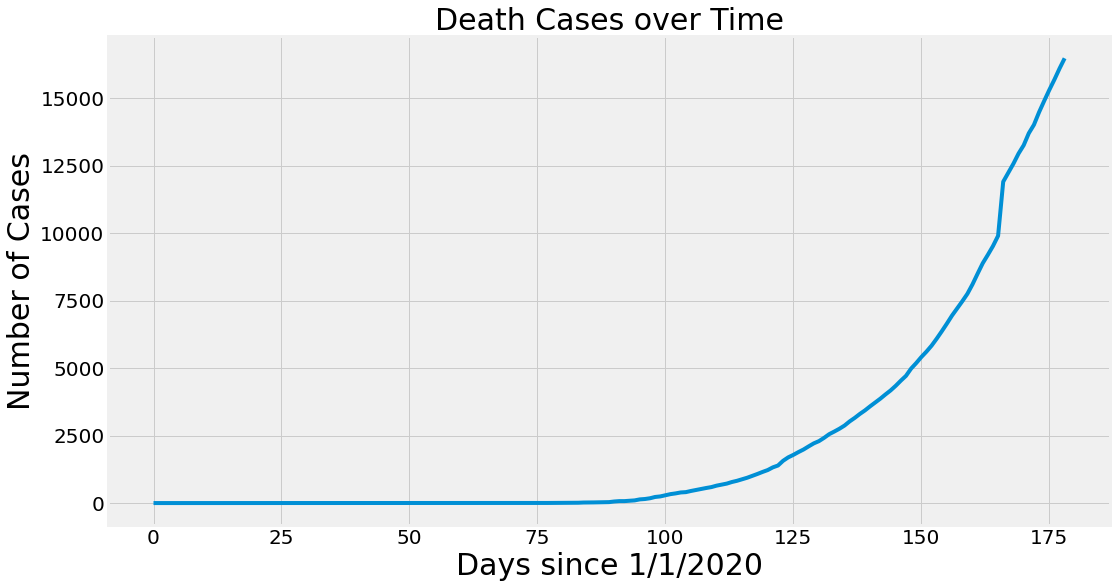

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

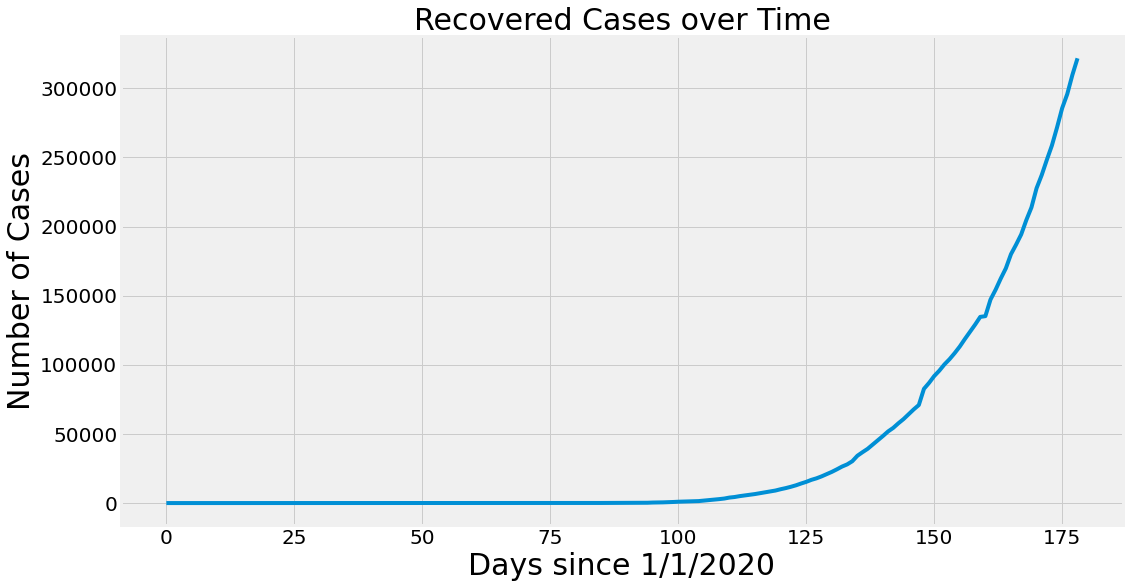

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# print(len(X),len(Y_confirmed))

In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2,shuffle=False)

In [ ]:
svm_confirmed=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_confirmed.fit(X_train_confirmed,Y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)

In [ ]:
svm_pred

array([-9.34208672e+02, -9.34208670e+02, -9.34208613e+02, -9.34208230e+02,
       -9.34206809e+02, -9.34202986e+02, -9.34194524e+02, -9.34178093e+02,
       -9.34149054e+02, -9.34101239e+02, -9.34026734e+02, -9.33915659e+02,
       -9.33755953e+02, -9.33533150e+02, -9.33230168e+02, -9.32827083e+02,
       -9.32300918e+02, -9.31625418e+02, -9.30770837e+02, -9.29703717e+02,
       -9.28386669e+02, -9.26778157e+02, -9.24832278e+02, -9.22498544e+02,
       -9.19721665e+02, -9.16441328e+02, -9.12591982e+02, -9.08102615e+02,
       -9.02896542e+02, -8.96891181e+02, -8.89997836e+02, -8.82121483e+02,
       -8.73160545e+02, -8.63006679e+02, -8.51544554e+02, -8.38651636e+02,
       -8.24197966e+02, -8.08045945e+02, -7.90050113e+02, -7.70056935e+02,
       -7.47904575e+02, -7.23422687e+02, -6.96432188e+02, -6.66745047e+02,
       -6.34164062e+02, -5.98482641e+02, -5.59484588e+02, -5.16943884e+02,
       -4.70624463e+02, -4.20280000e+02, -3.65653690e+02, -3.06478031e+02,
       -2.42474603e+02, -

In [ ]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Root mean square error 120909.74498210377
Root mean absolute error 327.764455033243


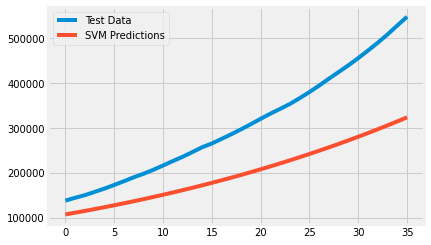

In [ ]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(Y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data','SVM Predictions'])
mse = math.sqrt(mean_squared_error(svm_test_pred, Y_test_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(svm_test_pred, Y_test_confirmed)) 
print('Root mean absolute error', mae) 

In [ ]:
# len(future_forecast_dates),len(svm_pred)

In [ ]:
svm_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'SVM Predicted # number of Confirmed cases in India':np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # number of Confirmed cases in India
0,2020-06-28,333405.0
1,2020-06-29,342849.0
2,2020-06-30,352505.0
3,2020-07-01,362377.0
4,2020-07-02,372469.0
5,2020-07-03,382783.0
6,2020-07-04,393324.0
7,2020-07-05,404096.0
8,2020-07-06,415101.0
9,2020-07-07,426345.0


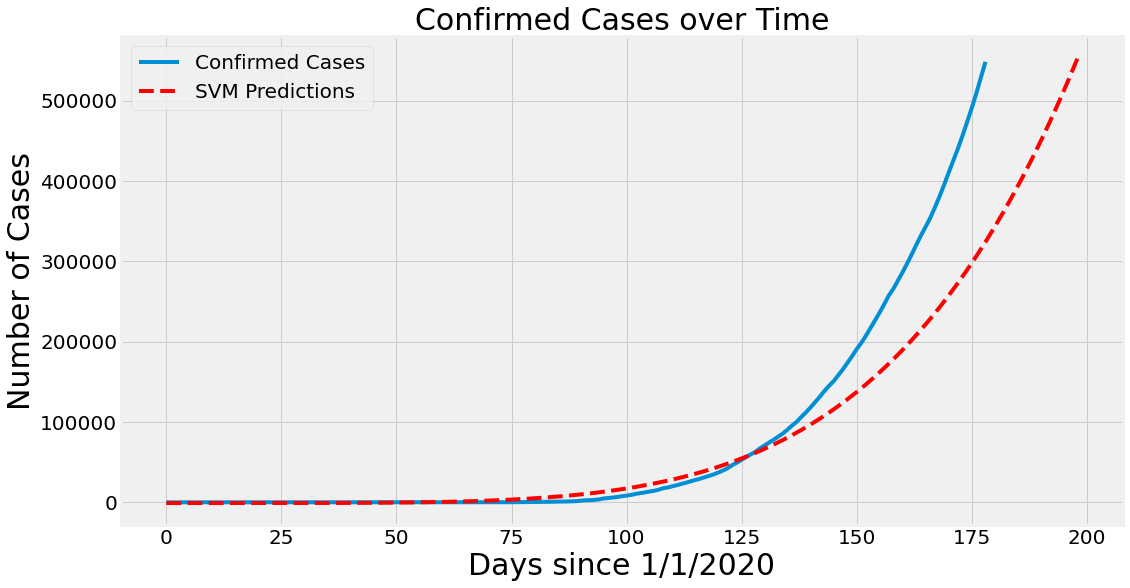

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','SVM Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***`DEATHS`***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2,shuffle=False)

In [ ]:
svm_deaths=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_deaths.fit(X_train_deaths,Y_train_deaths)
svm_pred=svm_deaths.predict(future_forecast)

Root mean square error 2798.398159153992
Root mean absolute error 46.68268522744836


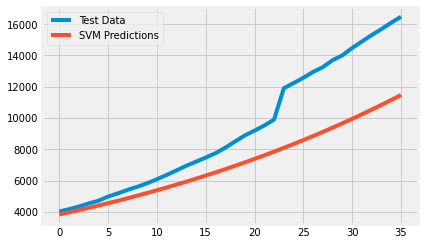

In [ ]:
svm_test_pred=svm_deaths.predict(X_test_deaths)
plt.plot(Y_test_deaths)
plt.plot(svm_test_pred)
plt.legend(['Test Data','SVM Predictions'])
mse = math.sqrt(mean_squared_error(svm_test_pred, Y_test_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(svm_test_pred, Y_test_deaths)) 
print('Root mean absolute error', mae) 

In [ ]:
svm_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'SVM Predicted # number of Deaths in India':np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # number of Deaths in India
0,2020-06-28,11797.0
1,2020-06-29,12130.0
2,2020-06-30,12471.0
3,2020-07-01,12819.0
4,2020-07-02,13175.0
5,2020-07-03,13539.0
6,2020-07-04,13911.0
7,2020-07-05,14291.0
8,2020-07-06,14680.0
9,2020-07-07,15076.0


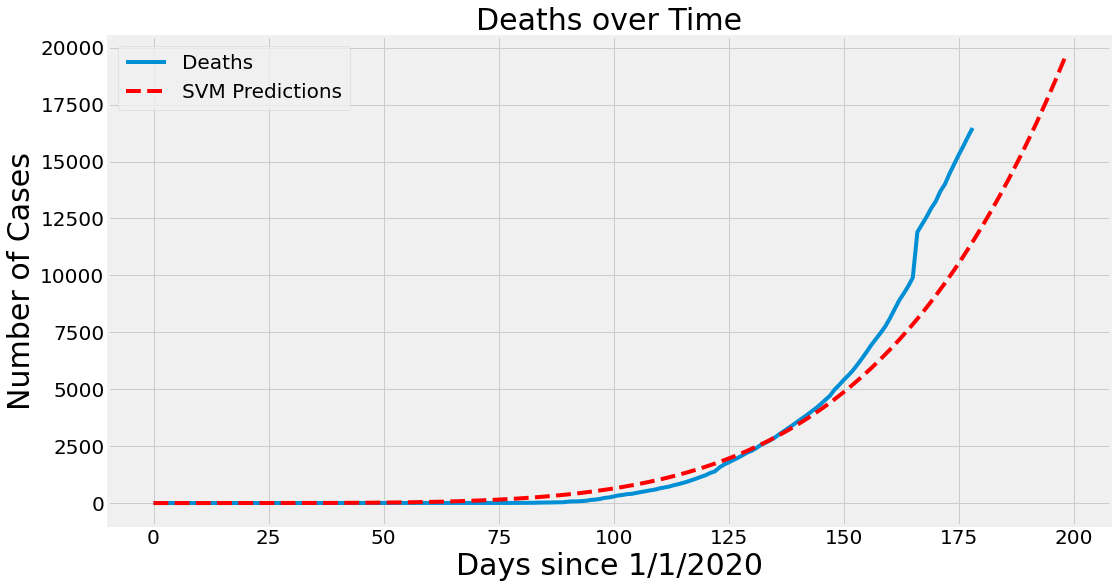

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title('Deaths over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','SVM Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Recovered***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2,shuffle=False)

In [ ]:
svm_recovered=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_recovered.fit(X_train_recovered,Y_train_recovered)
svm_pred=svm_recovered.predict(future_forecast)

Root mean square error 117934.83844912302
Root mean absolute error 320.1904442973551


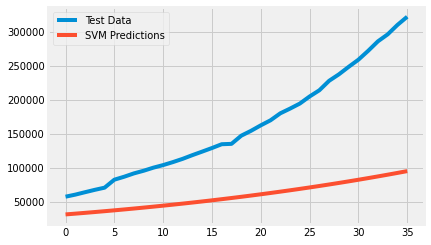

In [ ]:
svm_test_pred=svm_recovered.predict(X_test_recovered)
plt.plot(Y_test_recovered)
plt.plot(svm_test_pred)
plt.legend(['Test Data','SVM Predictions'])
mse = math.sqrt(mean_squared_error(svm_test_pred, Y_test_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(svm_test_pred, Y_test_recovered)) 
print('Root mean absolute error', mae) 

In [ ]:
svm_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'SVM Predicted # number of Recovered cases in India':np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # number of Recovered cases in India
0,2020-06-28,97932.0
1,2020-06-29,100706.0
2,2020-06-30,103543.0
3,2020-07-01,106443.0
4,2020-07-02,109407.0
5,2020-07-03,112437.0
6,2020-07-04,115534.0
7,2020-07-05,118698.0
8,2020-07-06,121931.0
9,2020-07-07,125233.0


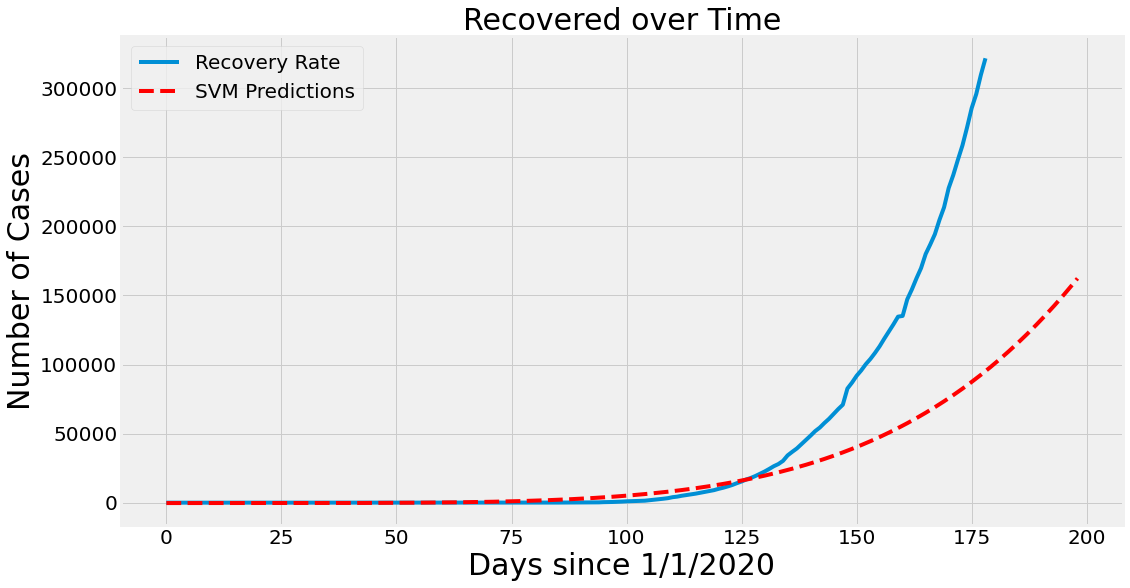

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title('Recovered over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recovery Rate','SVM Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()